## Market Volatility Pattern Analysis"

## Importing required libraries

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [52]:
# Define stock symbol and date range
stock_symbol = 'AAPL'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=7)).strftime('%Y-%m-%d')

# Fetch the intraday data with a 5-minute interval
data = yf.download(stock_symbol, start=start_date, end=end_date, interval='5m')

# Display the data
data



*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-12-17 14:30:00+00:00,250.770004,251.250000,249.789993,250.134995,2105605
2024-12-17 14:35:00+00:00,251.399994,251.549896,250.589996,250.759995,621725
2024-12-17 14:40:00+00:00,252.779999,252.860397,251.309998,251.399994,1196193
2024-12-17 14:45:00+00:00,252.570007,252.809998,252.250000,252.750000,704175
2024-12-17 14:50:00+00:00,252.595001,252.979996,252.509995,252.589996,585594
...,...,...,...,...,...
2024-12-23 20:35:00+00:00,254.514999,254.699997,254.449997,254.505005,336058
2024-12-23 20:40:00+00:00,254.740005,254.871002,254.490005,254.514999,278907


## DATA PREPROCESSING

In [56]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-12-17 14:30:00+00:00,250.770004,251.250000,249.789993,250.134995,2105605
2024-12-17 14:35:00+00:00,251.399994,251.549896,250.589996,250.759995,621725
2024-12-17 14:40:00+00:00,252.779999,252.860397,251.309998,251.399994,1196193
2024-12-17 14:45:00+00:00,252.570007,252.809998,252.250000,252.750000,704175
2024-12-17 14:50:00+00:00,252.595001,252.979996,252.509995,252.589996,585594
...,...,...,...,...,...
2024-12-23 20:35:00+00:00,254.514999,254.699997,254.449997,254.505005,336058
2024-12-23 20:40:00+00:00,254.740005,254.871002,254.490005,254.514999,278907


In [58]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-12-17 14:30:00+00:00,250.770004,251.250000,249.789993,250.134995,2105605
2024-12-17 14:35:00+00:00,251.399994,251.549896,250.589996,250.759995,621725
2024-12-17 14:40:00+00:00,252.779999,252.860397,251.309998,251.399994,1196193
2024-12-17 14:45:00+00:00,252.570007,252.809998,252.250000,252.750000,704175
2024-12-17 14:50:00+00:00,252.595001,252.979996,252.509995,252.589996,585594
2024-12-17 14:55:00+00:00,252.039993,252.589996,251.929993,252.589996,433957
2024-12-17 15:00:00+00:00,252.509995,252.539993,252.032501,252.039993,412785
2024-12-17 15:05:00+00:00,252.148804,252.580002,252.009995,252.509995,432430


data.tail(10)

In [61]:
data.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

## DESCRIPTIVE STATISTICS

In [65]:
print("\nDescriptive statistics of the dataset:")

data.describe()


Descriptive statistics of the dataset:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02
mean,252.445625,252.659919,252.210133,252.426410,4.830080e+05
std,1.814600,1.744902,1.887103,1.823856,8.585373e+05
min,246.831299,247.169998,246.300003,246.860001,1.375290e+05
25%,251.062504,251.380005,250.832500,251.032497,2.254902e+05
50%,253.020004,253.179993,252.850006,253.020004,3.064255e+05
75%,253.787575,253.889999,253.595230,253.786243,4.942888e+05
max,255.360001,255.649994,255.089996,255.350006,1.493843e+07


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2024-12-17 14:30:00+00:00 to 2024-12-23 20:55:00+00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   390 non-null    float64
 1   (High, AAPL)    390 non-null    float64
 2   (Low, AAPL)     390 non-null    float64
 3   (Open, AAPL)    390 non-null    float64
 4   (Volume, AAPL)  390 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 18.3 KB


In [69]:
data.duplicated().sum()

0

In [71]:
# no duplicate values in the data 

In [73]:
data[data.duplicated()]

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,


In [76]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-12-17 14:30:00+00:00,250.770004,251.250000,249.789993,250.134995,2105605
2024-12-17 14:35:00+00:00,251.399994,251.549896,250.589996,250.759995,621725
2024-12-17 14:40:00+00:00,252.779999,252.860397,251.309998,251.399994,1196193
2024-12-17 14:45:00+00:00,252.570007,252.809998,252.250000,252.750000,704175
2024-12-17 14:50:00+00:00,252.595001,252.979996,252.509995,252.589996,585594
...,...,...,...,...,...
2024-12-23 20:35:00+00:00,254.514999,254.699997,254.449997,254.505005,336058
2024-12-23 20:40:00+00:00,254.740005,254.871002,254.490005,254.514999,278907


In [79]:
# Calculate Rolling Volatility (using standard deviation over 20-period window)
data['returns'] = data['Close'].pct_change()
data['rolling_volatility'] = data['returns'].rolling(window=20).std() * np.sqrt(5)  # annualized volatility estimate

# Calculate VWAP (Volume-Weighted Average Price)
data['vwap'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Calculate Moving Averages (20-period and 50-period)
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Identify unusual trading patterns: Significant price spikes
data['price_spike'] = data['Close'].pct_change() > 0.02  # 2% price spike

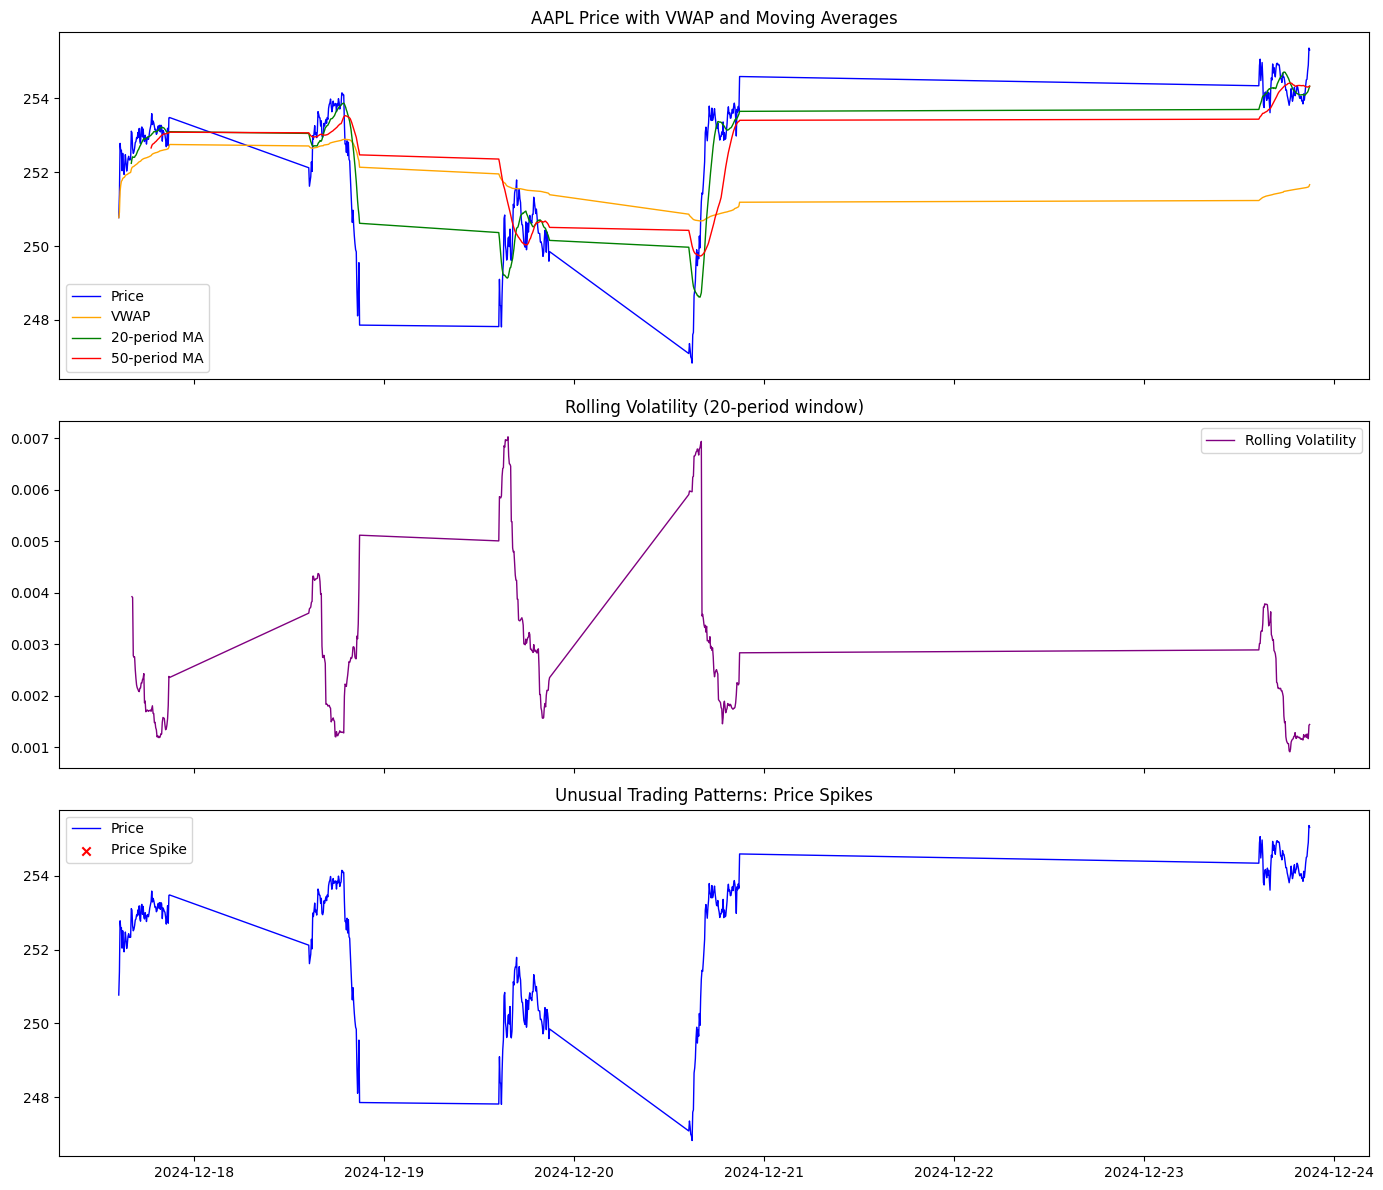

In [81]:
# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Price chart with VWAP and Moving Averages
axes[0].plot(data['Close'], label='Price', color='blue', linewidth=1)
axes[0].plot(data['vwap'], label='VWAP', color='orange', linewidth=1)
axes[0].plot(data['MA_20'], label='20-period MA', color='green', linewidth=1)
axes[0].plot(data['MA_50'], label='50-period MA', color='red', linewidth=1)
axes[0].set_title(f'{stock_symbol} Price with VWAP and Moving Averages')
axes[0].legend()

# Rolling Volatility Chart
axes[1].plot(data['rolling_volatility'], label='Rolling Volatility', color='purple', linewidth=1)
axes[1].set_title('Rolling Volatility (20-period window)')
axes[1].legend()

# Plotting Unusual Price Spikes
axes[2].plot(data['Close'], label='Price', color='blue', linewidth=1)
axes[2].scatter(data.index[data['price_spike']], data['Close'][data['price_spike']], color='red', label='Price Spike', marker='x')
axes[2].set_title('Unusual Trading Patterns: Price Spikes')
axes[2].legend()

plt.tight_layout()
plt.show()

In [93]:
#  Handle missing values
data = data.dropna()  # Remove rows with any missing values

# Identify and remove outliers using Z-score (for returns)
from scipy.stats import zscore

data['returns'] = data['Close'].pct_change()
data['z_score'] = zscore(data['returns'].dropna())

# Define outliers as z-scores > 3 or < -3
outliers = data[abs(data['z_score']) > 3]
data_cleaned = data[abs(data['z_score']) <= 3]

# Display cleaned data
data_cleaned.head()

Price,Close,High,Low,Open,Volume,returns,rolling_volatility,vwap,MA_20,MA_50,price_spike,z_score
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Datetime,,,,,,,,,,,,


In [ ]:
# Create a correlation heatmap for price and volume
correlation_matrix = data_cleaned[['Close', 'Volume']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation between Price and Volume')
plt.show()


In [ ]:
from scipy.stats import skew

In [87]:
# Calculate statistical measures for the cleaned data
std_dev = data_cleaned['returns'].std()
skewness = skew(data_cleaned['returns'].dropna())

print(f"Standard Deviation of Returns: {std_dev:.4f}")
print(f"Skewness of Returns: {skewness:.4f}")


Standard Deviation of Returns: nan
Skewness of Returns: nan


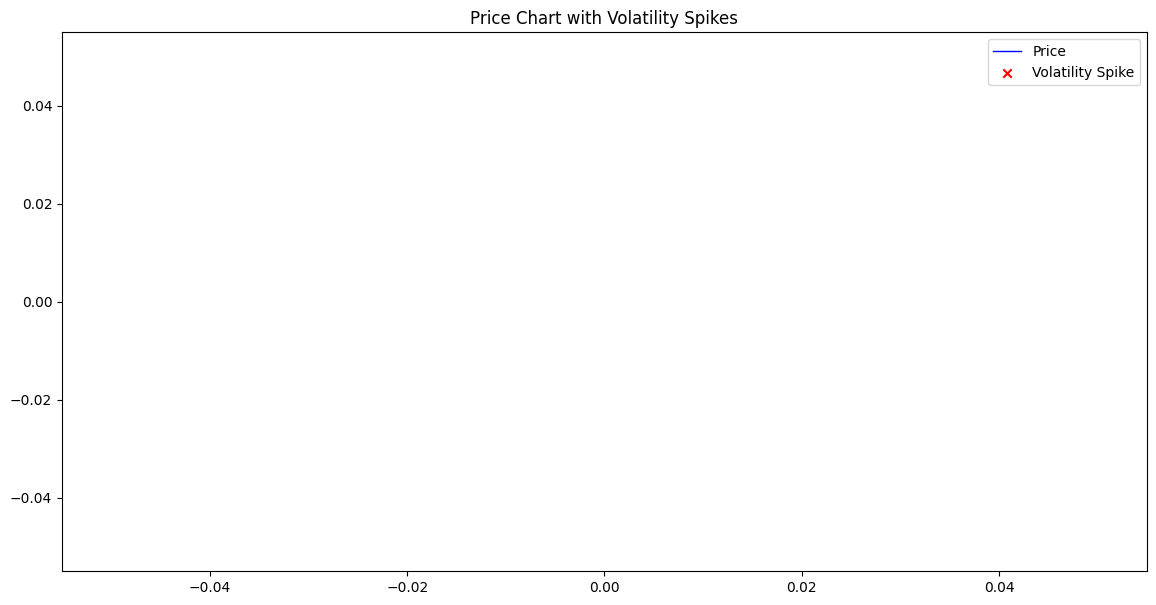

Price,Close,rolling_volatility
Ticker,AAPL,
Datetime,,


In [88]:
# Investigating an interesting pattern: Identify volatility spikes
data_cleaned['rolling_volatility'] = data_cleaned['returns'].rolling(window=20).std() * np.sqrt(5)

# Define a volatility spike as a significant increase in volatility (e.g., > 2 std devs above the mean)
volatility_threshold = data_cleaned['rolling_volatility'].mean() + 2 * data_cleaned['rolling_volatility'].std()
volatility_spikes = data_cleaned[data_cleaned['rolling_volatility'] > volatility_threshold]

# Plotting volatility spikes on the price chart
plt.figure(figsize=(14, 7))
plt.plot(data_cleaned['Close'], label='Price', color='blue', linewidth=1)
plt.scatter(volatility_spikes.index, volatility_spikes['Close'], color='red', label='Volatility Spike', marker='x')
plt.title('Price Chart with Volatility Spikes')
plt.legend()
plt.show()

# Display details of the volatility spikes
volatility_spikes[['Close', 'rolling_volatility']].head()